In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import json

In [2]:
acc0 = np.load("../ckpts/math_aug2_easy0.42_hard0.58_total20000/train_aug_answer_types2_seed0.npy")==0
acc1 = np.load("../ckpts/math_aug2_easy0.42_hard0.58_total20000/train_aug_answer_types2_seed1.npy")==0
acc2 = np.load("../ckpts/math_aug2_easy0.42_hard0.58_total20000/train_aug_answer_types2_seed2.npy")==0
acc3 = np.load("../ckpts/math_aug2_easy0.42_hard0.58_total20000/train_aug_answer_types2_seed3.npy")==0


train_accs = np.concatenate([acc0, acc1, acc2, acc3], axis=1)

In [3]:
samples0 = np.load("../ckpts/math_aug2_easy0.42_hard0.58_total20000/train_aug_answers2_seed0.npy")
samples1 = np.load("../ckpts/math_aug2_easy0.42_hard0.58_total20000/train_aug_answers2_seed1.npy")
samples2 = np.load("../ckpts/math_aug2_easy0.42_hard0.58_total20000/train_aug_answers2_seed2.npy")
samples3 = np.load("../ckpts/math_aug2_easy0.42_hard0.58_total20000/train_aug_answers2_seed3.npy")

train_samples = np.concatenate([samples0, samples1, samples2, samples3], axis=1)

In [4]:
with open('../data/MATH_aug/AugMATH_part1.jsonl', 'r') as json_file:
    json_list = list(json_file)

with open('../data/MATH_aug/AugMATH_part2.jsonl', 'r') as json_file:
    json_list += list(json_file)

train_questions = []
train_answers = []
for json_str in json_list:
    result = json.loads(json_str)
    train_questions.append(result["query"])
    train_answers.append(result["response"])
    
train_questions = np.array(train_questions)
train_answers = np.array(train_answers)

In [5]:
subsample_idxs = np.load("../ckpts/math_aug2_easy0.42_hard0.58_total20000/subsample_idxs.npy")


In [6]:

num_memorized_all = []
num_correct_different_all = []
num_incorrect_all = []

for input_idx in range(len(subsample_idxs)):
    num_memorized = 0
    num_correct_different = 0
    num_incorrect = 0
    for sample_idx in range(8):
        correct = train_accs[input_idx, sample_idx]
        if correct:
            if train_samples[input_idx][sample_idx].strip() == train_answers[subsample_idxs[input_idx]].strip():
                num_memorized+=1
            else:
                num_correct_different+=1
        else:
            num_incorrect+=1 
    num_memorized_all.append(num_memorized)
    num_correct_different_all.append(num_correct_different)
    num_incorrect_all.append(num_incorrect)

num_memorized_all = np.array(num_memorized_all)
num_correct_different_all = np.array(num_correct_different_all)
num_incorrect_all = np.array(num_incorrect_all)

/tmp/ipykernel_13449/3141162540.py:2: RuntimeWarning: invalid value encountered in divide
  plt.scatter(num_incorrect_all+np.random.uniform(-0.5, 0.5, len(num_incorrect_all)), num_memorized_all/(num_memorized_all+num_correct_different_all)+np.random.uniform(-0.1, 0.1, len(num_incorrect_all)), alpha=0.05)


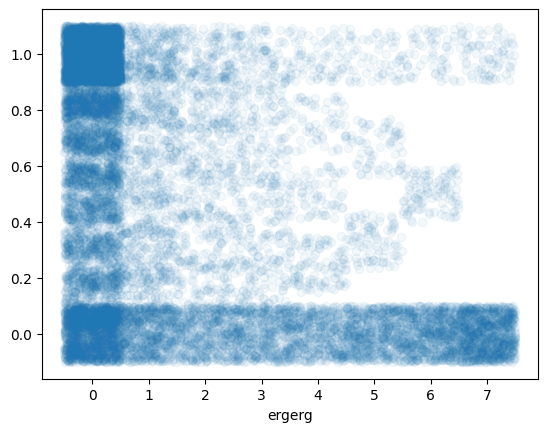

In [28]:
# plt.hist()
plt.scatter(num_incorrect_all+np.random.uniform(-0.5, 0.5, len(num_incorrect_all)), num_memorized_all/(num_memorized_all+num_correct_different_all)+np.random.uniform(-0.1, 0.1, len(num_incorrect_all)), alpha=0.05)
plt.xlabel("ergerg")
plt.savefig("delete.jpg")


In [17]:
len(np.where(num_memorized_all/(num_memorized_all+num_correct_different_all)==1)[0])

/tmp/ipykernel_1084/129515264.py:1: RuntimeWarning: invalid value encountered in divide
  len(np.where(num_memorized_all/(num_memorized_all+num_correct_different_all)==1)[0])


4467

In [20]:
len(np.union1d(np.where(num_memorized_all+num_correct_different_all==0)[0], np.where(num_memorized_all/(num_memorized_all+num_correct_different_all)<1)[0]))

/tmp/ipykernel_1084/2137473534.py:1: RuntimeWarning: invalid value encountered in divide
  len(np.union1d(np.where(num_memorized_all+num_correct_different_all==0)[0], np.where(num_memorized_all/(num_memorized_all+num_correct_different_all)<1)[0]))


15533

In [13]:
len(num_memorized_all)-4467

15533

In [21]:
np.save("../ckpts/math_aug2_easy0.42_hard0.58_total20000/subsample_idxs_memorized<1.npy", np.union1d(np.where(num_memorized_all+num_correct_different_all==0)[0], np.where(num_memorized_all/(num_memorized_all+num_correct_different_all)<1)[0]))

/tmp/ipykernel_1084/3606271187.py:1: RuntimeWarning: invalid value encountered in divide
  np.save("../ckpts/math_aug2_easy0.42_hard0.58_total20000/subsample_idxs_memorized<1.npy", np.union1d(np.where(num_memorized_all+num_correct_different_all==0)[0], np.where(num_memorized_all/(num_memorized_all+num_correct_different_all)<1)[0]))


In [22]:
np.save("../ckpts/math_aug2_easy0.42_hard0.58_total20000/subsample_idxs_memorized<=0pt5.npy", np.union1d(np.where(num_memorized_all+num_correct_different_all==0)[0], np.where(num_memorized_all/(num_memorized_all+num_correct_different_all)<=0.5)[0]))

/tmp/ipykernel_1084/1453373955.py:1: RuntimeWarning: invalid value encountered in divide
  np.save("../ckpts/math_aug2_easy0.42_hard0.58_total20000/subsample_idxs_memorized<=0pt5.npy", np.union1d(np.where(num_memorized_all+num_correct_different_all==0)[0], np.where(num_memorized_all/(num_memorized_all+num_correct_different_all)<=0.5)[0]))


In [24]:
num_idxs = len(np.union1d(np.where(num_memorized_all+num_correct_different_all==0)[0], np.where(num_memorized_all/(num_memorized_all+num_correct_different_all)<1)[0]))

np.save("../ckpts/math_aug2_easy0.42_hard0.58_total20000/subsample_idxs_rand<1.npy",np.random.choice(subsample_idxs, num_idxs, replace=False))

/tmp/ipykernel_1084/1313102636.py:1: RuntimeWarning: invalid value encountered in divide
  num_idxs = len(np.union1d(np.where(num_memorized_all+num_correct_different_all==0)[0], np.where(num_memorized_all/(num_memorized_all+num_correct_different_all)<1)[0]))


In [26]:
idxs = (np.load("../ckpts/math_aug2_easy0.42_hard0.58_total20000/subsample_idxs_memorized<1.npy"))

(array([7841., 2606., 1867., 1575.,    0., 1234., 1173., 1001., 1136.,
        1567.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

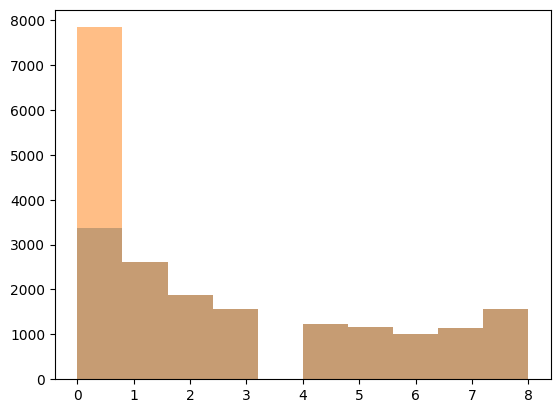

In [31]:
plt.hist(num_correct_different_all[idxs], alpha=0.5)
plt.hist(num_correct_different_all, alpha=0.5)